In [1]:
pip install transformers torch scikit-learn pandas matplotlib

In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("/content/drive/MyDrive/validation_dataset_final.csv", encoding="ISO-8859-1")

# Extract texts and labels
texts = data["text"].tolist()
true_labels = data["label"].tolist()  # Only needed for evaluation



In [4]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load tokenizer and model
model_path = "shanthi-323/fine-tuned-bert-CBT"  # Replace with your actual path
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Set the model to evaluation mode
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [5]:
# Tokenize the texts
inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,  # Adjust max_length if needed
    return_tensors="pt"
)


In [6]:
# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Convert logits to predicted labels
predicted_labels = torch.argmax(logits, dim=1).tolist()


In [8]:
id2label = {
    0: "Mind Reading",
    1: "Overgeneralization",
    2: "Magnification",
    3: "Labelling",
    4: "Personalization",
    5: "Fortune-telling",
    6: "Emotional Reasoning",
    7: "Mental Filter",
    8: "Should Statements",
    9: "All-or-Nothing Thinking",
    10: "No Distortion"
}


In [9]:
predicted_labels = [id2label[label] for label in predicted_labels]

In [10]:
print(type(true_labels[0]))  # Should output <class 'str'>

<class 'str'>


In [13]:
print("Unique true labels:", set(true_labels))
print("Unique predicted labels:", set(predicted_labels))
print("Labels in id2label:", model.config.id2label.values())


Unique true labels: {'All-or-Nothing Thinking', 'Personalization', 'Should Statements', 'Mind Reading', 'Labelling', 'Fortune-telling', 'Emotional Reasoning', 'No Distortion', 'Magnification', 'Overgeneralization', 'Mental Filter'}
Unique predicted labels: {'Personalization', 'Should Statements', 'Mind Reading', 'Labelling', 'Emotional Reasoning', 'Fortune-telling', 'Magnification', 'Overgeneralization', 'Mental Filter'}
Labels in id2label: dict_values(['LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5', 'LABEL_6', 'LABEL_7', 'LABEL_8', 'LABEL_9', 'LABEL_10', 'LABEL_11', 'LABEL_12', 'LABEL_13', 'LABEL_14'])


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average="weighted")
recall = recall_score(true_labels, predicted_labels, average="weighted")
f1 = f1_score(true_labels, predicted_labels, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Detailed classification report
print(classification_report(true_labels, predicted_labels))


Accuracy: 0.5686274509803921
Precision: 0.5452557046210297
Recall: 0.5686274509803921
F1-Score: 0.5357738856008752
                         precision    recall  f1-score   support

All-or-Nothing Thinking       0.00      0.00      0.00        13
    Emotional Reasoning       0.90      0.82      0.86        11
        Fortune-telling       0.48      0.80      0.60        15
              Labelling       0.78      0.64      0.70        11
          Magnification       0.20      0.60      0.30         5
          Mental Filter       1.00      0.40      0.57         5
           Mind Reading       0.75      0.60      0.67         5
          No Distortion       0.00      0.00      0.00         5
     Overgeneralization       0.50      0.44      0.47         9
        Personalization       0.30      0.60      0.40         5
      Should Statements       0.79      0.83      0.81        18

               accuracy                           0.57       102
              macro avg       0.52    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

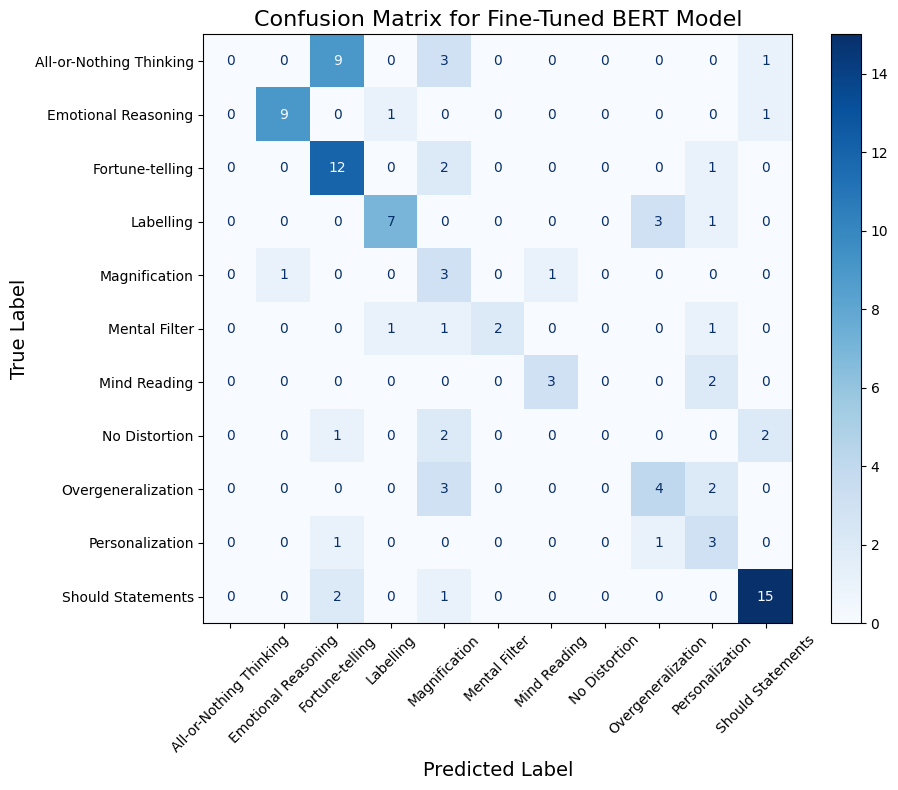

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `true_labels` and `predicted_labels` are ready and `used_labels` contains unique class labels
cm = confusion_matrix(true_labels, predicted_labels, labels=used_labels)

# Get the unique labels from true and predicted labels
used_labels = sorted(set(true_labels) | set(predicted_labels))

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=used_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix for Fine-Tuned BERT Model", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


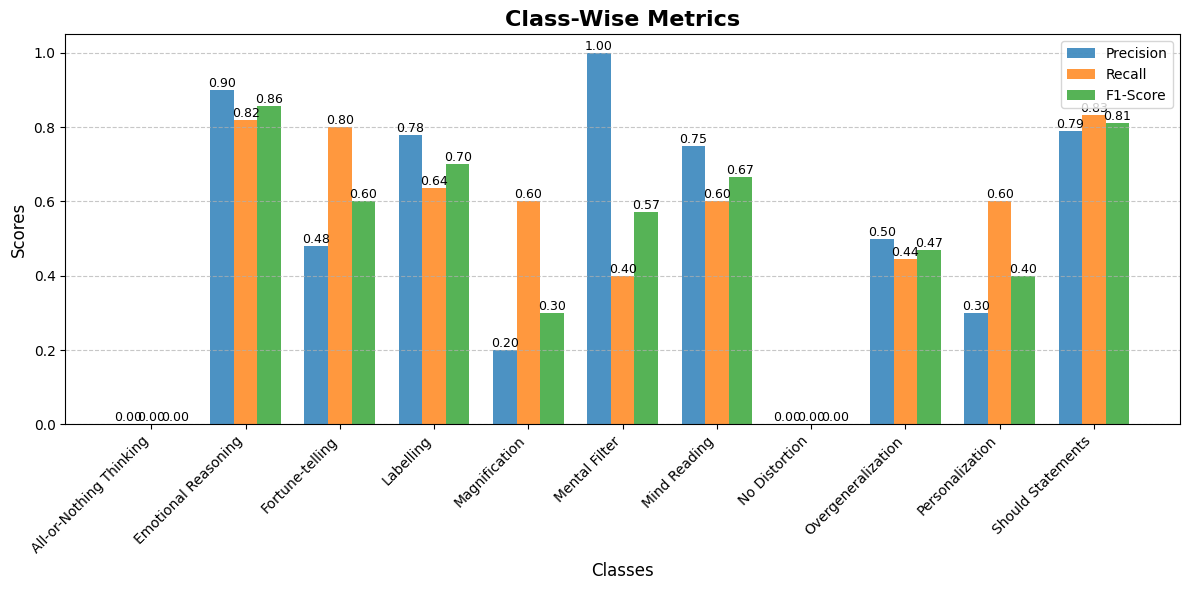

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report as a dictionary
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude overall metrics
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1 = [report[cls]["f1-score"] for cls in classes]

# Plot
x = np.arange(len(classes))
width = 0.25

# Set figure size
plt.figure(figsize=(12, 6))

# Plot precision, recall, and F1-score bars
bars1 = plt.bar(x - width, precision, width=width, label="Precision", alpha=0.8)
bars2 = plt.bar(x, recall, width=width, label="Recall", alpha=0.8)
bars3 = plt.bar(x + width, f1, width=width, label="F1-Score", alpha=0.8)

# Add value labels on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{bar.get_height():.2f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

# Customize x-axis
plt.xticks(x, classes, rotation=45, ha="right", fontsize=10)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Scores", fontsize=12)

# Add grid lines for easier comparison
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add title and legend
plt.title("Class-Wise Metrics", fontsize=16, fontweight="bold")
plt.legend(fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()
